<a href="https://colab.research.google.com/github/HatemMoushir/CAPTCHA/blob/main/CAPTCHA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import string
import random
from PIL import Image, ImageDraw, ImageFont

# إعدادات
CAPTCHA_LENGTH = 5
CHARS = string.ascii_uppercase + string.digits
# Use a font that is likely to be available in Colab
FONT_PATH = "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf"
OUTPUT_DIR = "captcha_images"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# توليد صورة واحدة
def generate_captcha(text, width=160, height=60):
    img = Image.new('RGB', (width, height), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    # Adjust font size if needed for the new font
    font = ImageFont.truetype(FONT_PATH, 40)

    for i, char in enumerate(text):
        draw.text((10 + i * 30, 10), char, font=font, fill=(0, 0, 0))

    return img

# توليد مجموعة بيانات
def generate_dataset(num_images=5000):
    for i in range(num_images):
        text = ''.join(random.choices(CHARS, k=CAPTCHA_LENGTH))
        img = generate_captcha(text)
        img.save(os.path.join(OUTPUT_DIR, f"{text}.png"))

generate_dataset(5000)

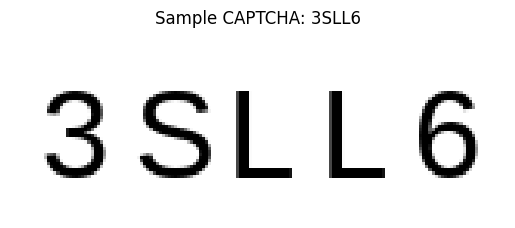

In [ ]:
import matplotlib.pyplot as plt

# اعرض صورة عشوائية من المجلد
sample_file = random.choice(os.listdir(OUTPUT_DIR))
img = Image.open(os.path.join(OUTPUT_DIR, sample_file))

plt.imshow(img)
plt.axis('off')
plt.title(f"Sample CAPTCHA: {sample_file.split('.')[0]}")
plt.show()